# Theory/Computation Problems






## Problem 1 (20 points)
Show that the stationary point (zero gradient) of the function$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

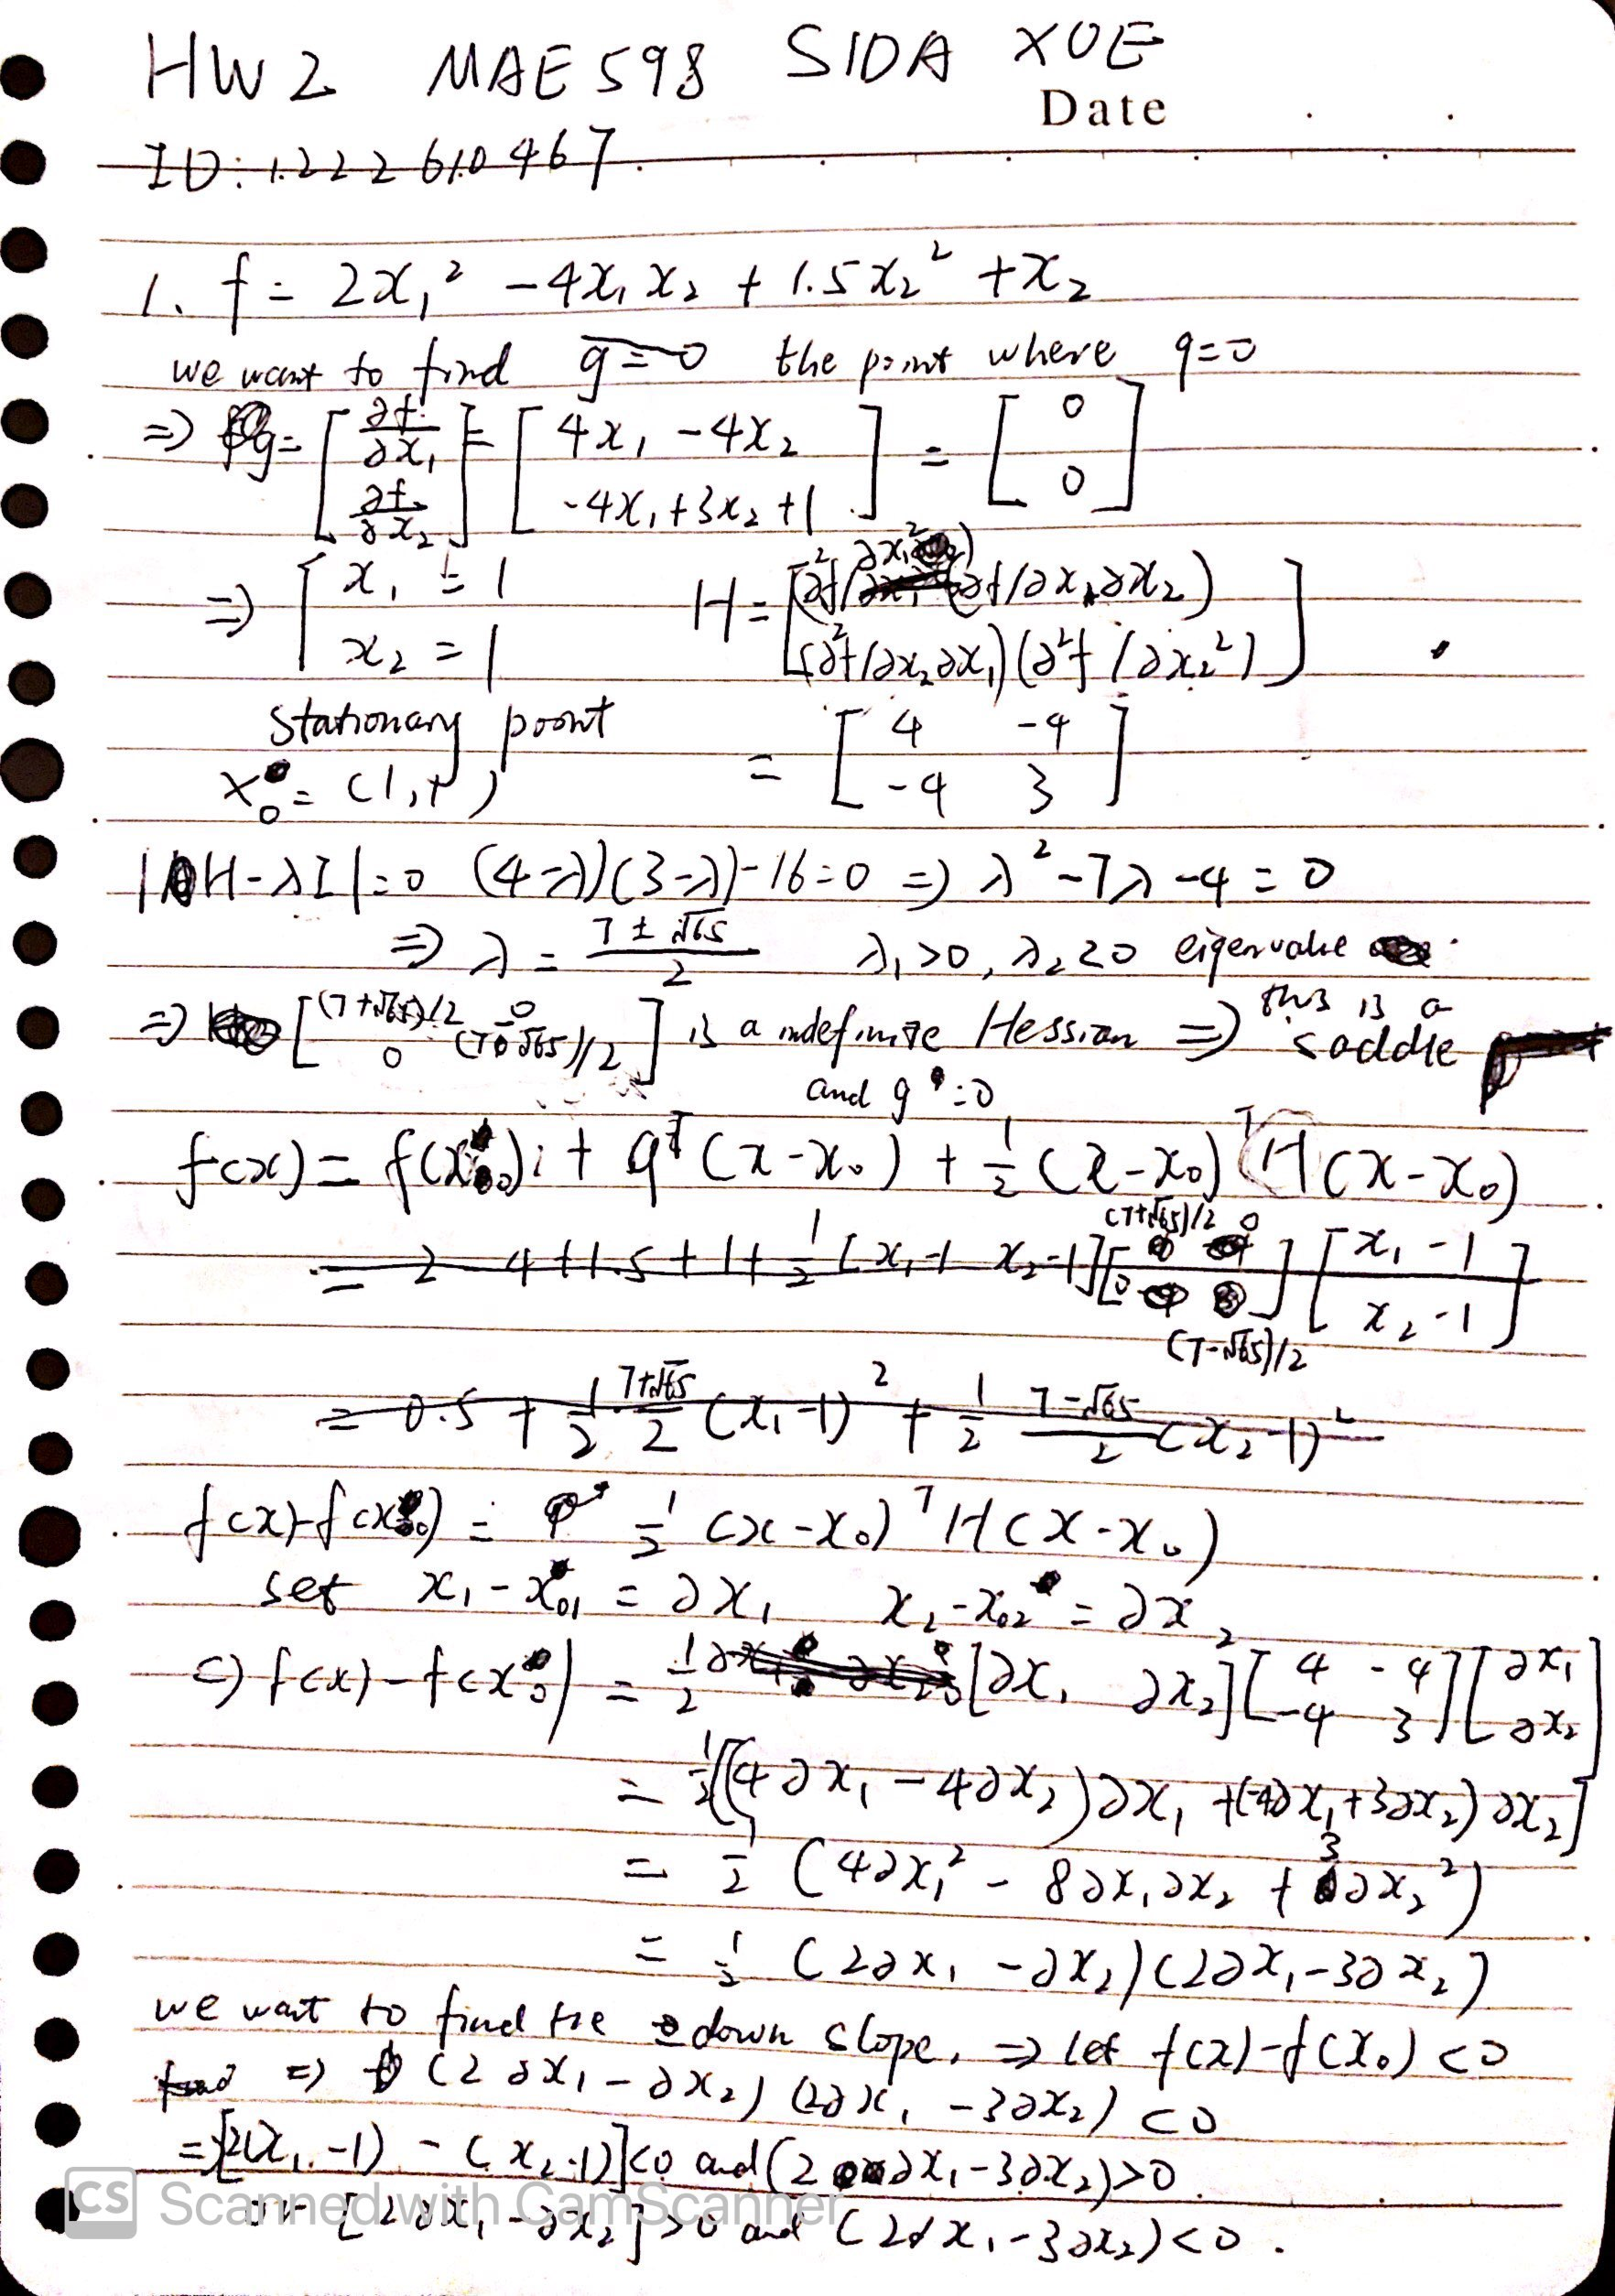

##  Problem 2 (50 points)
(10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.



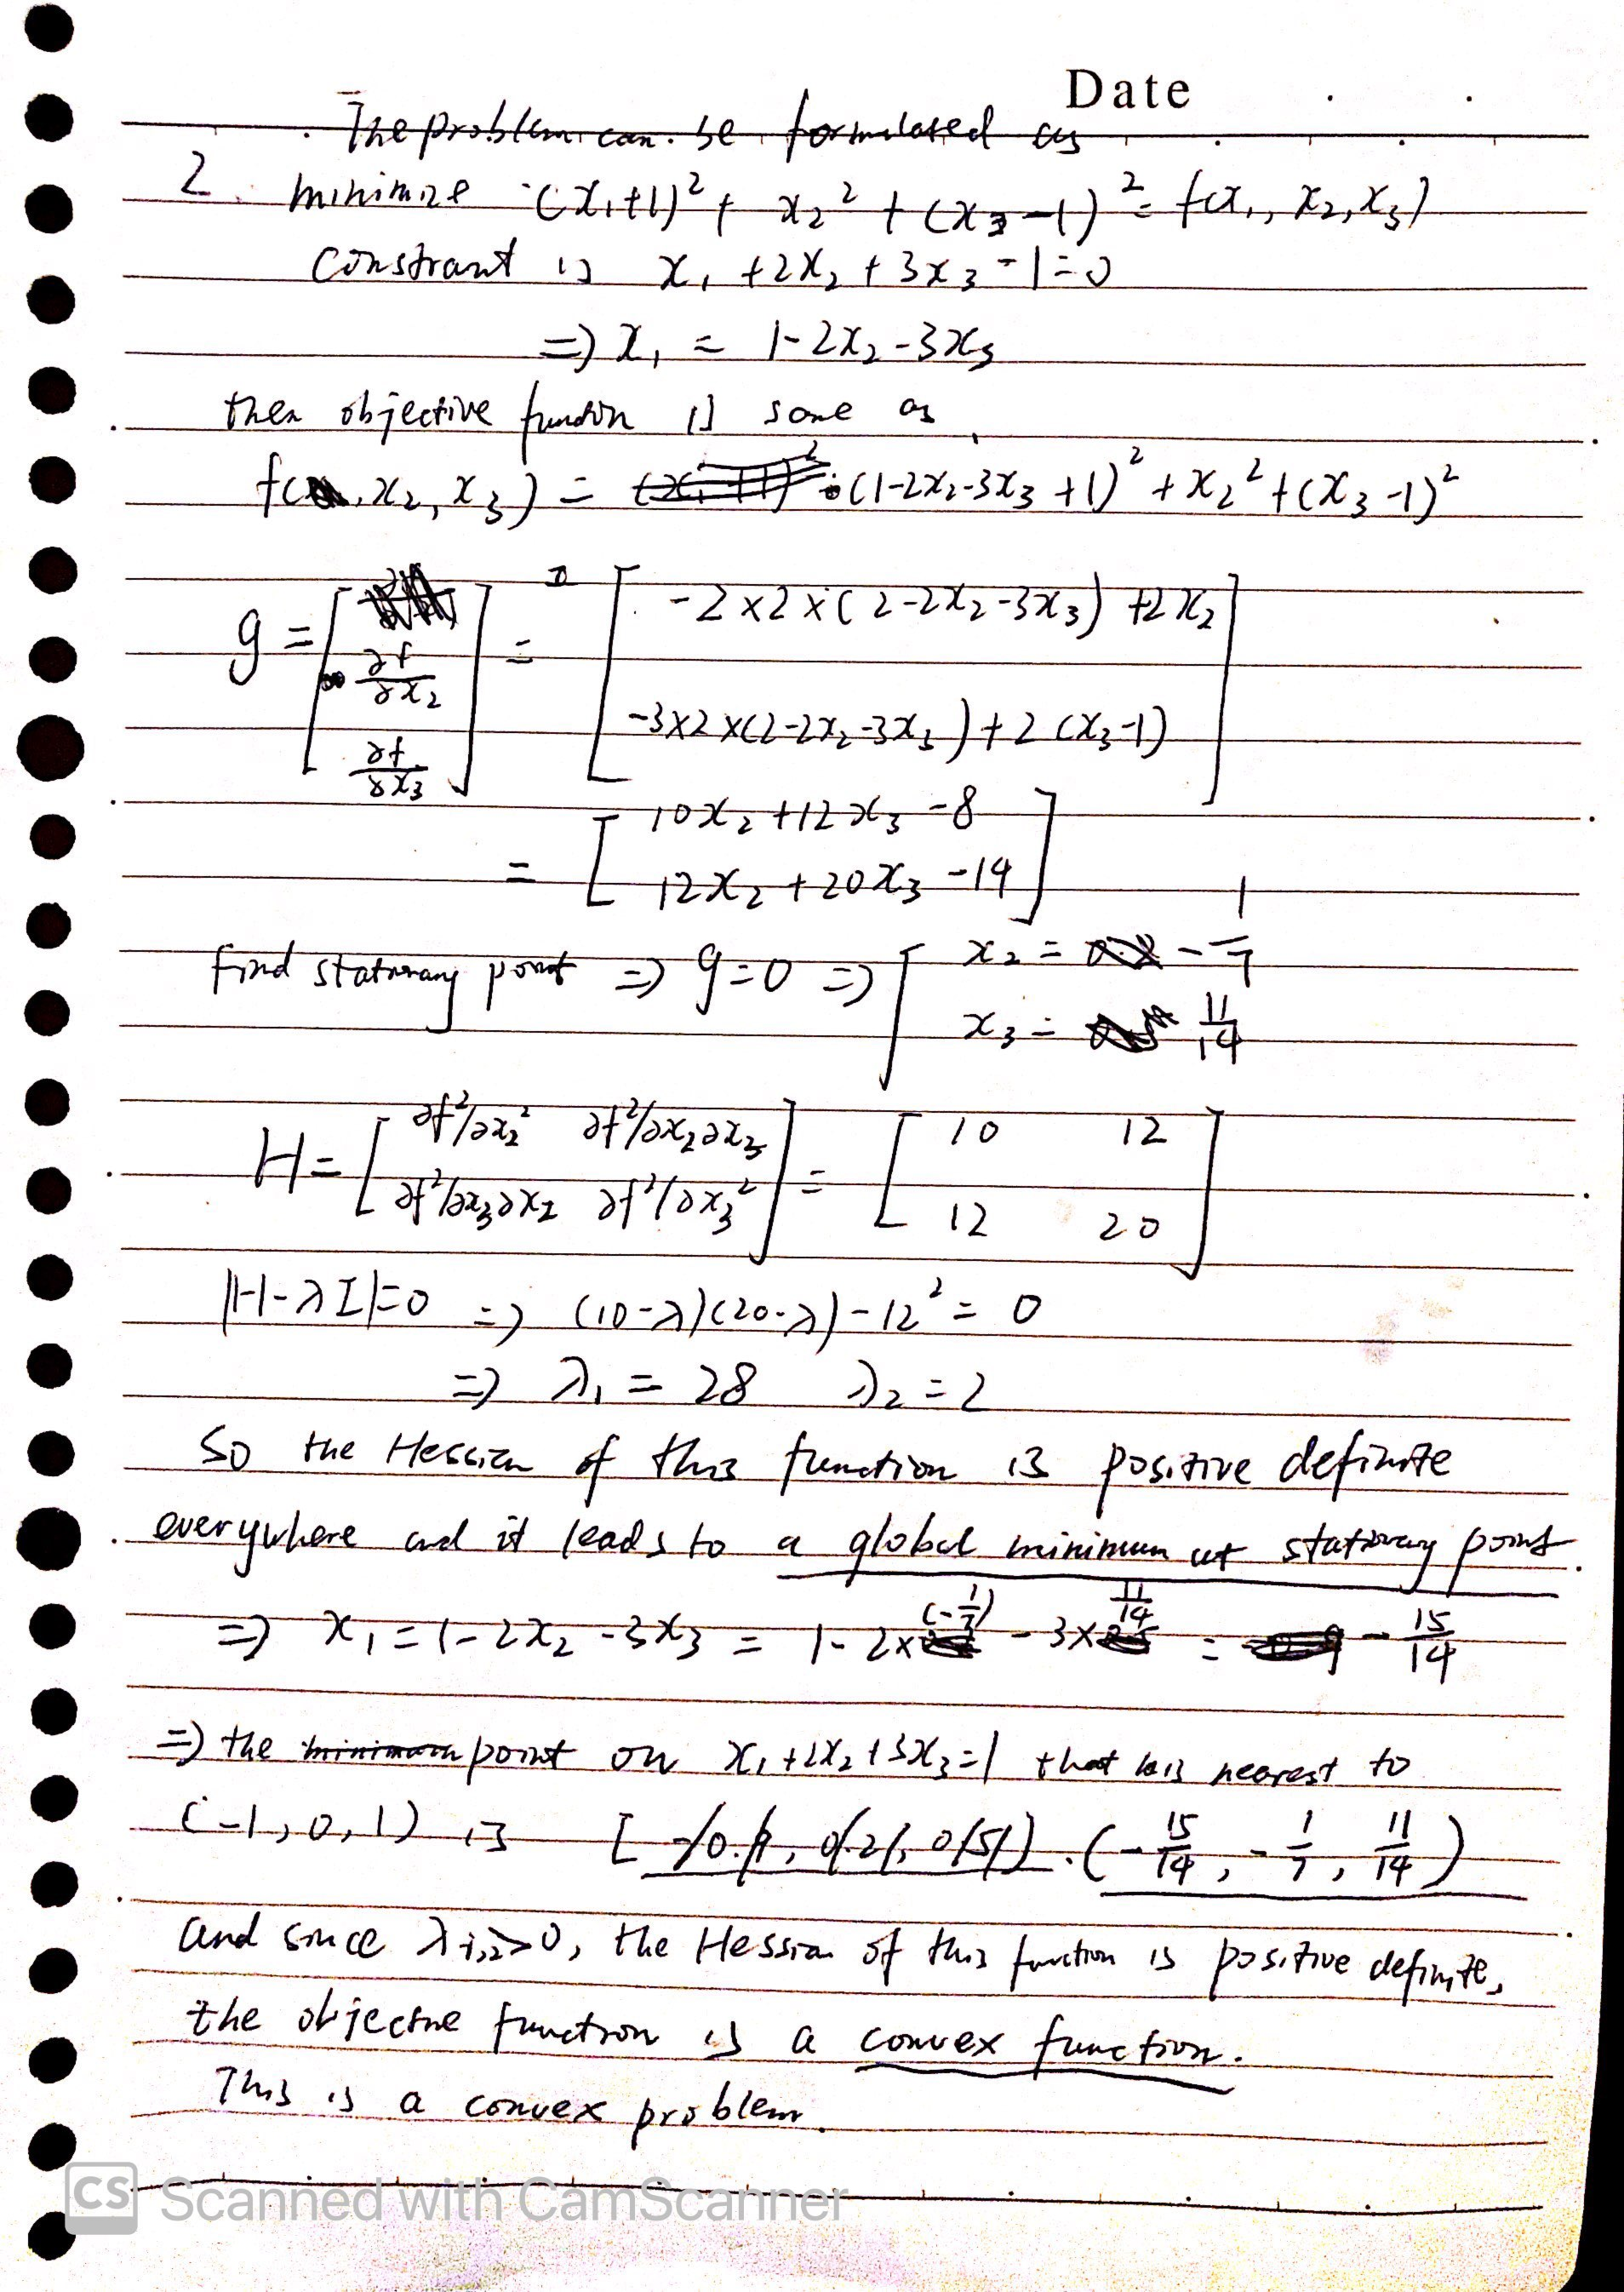

(40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

## 1 gradient descent method
- initial point is [0,1]
- the solution is [-0.14285278  0.78572083], which is a little different from the real solution, because the norm of the gradient is not zero, so it do not go to the real min

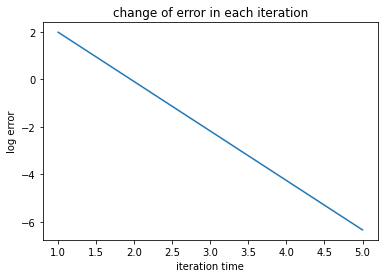

error_log is  [1.9756218592907135, -0.1038196823891223, -2.1832612240689584, -4.262702765748794, -6.34214430742863]
number of interation 5
the point that minimize the objective function is [1, 2, 3, 4, 5]
the coordinate of points in the process [array([0, 1]), array([-0.125 ,  0.8125]), array([-0.140625 ,  0.7890625]), array([-0.14257812,  0.78613281]), array([-0.14282227,  0.7857666 ]), array([-0.14285278,  0.78572083])]
The norm of the gradient value 0.00022006538546533137
error(norm of gradient) in the process [7.211102550927978, 0.9013878188659973, 0.11267347735824966, 0.014084184669781208, 0.001760523083722651, 0.00022006538546533137]


In [207]:
import numpy as np
k=0
eps=1e-3 
x=np.array([0,1])
obj = lambda x:(2-2*x[0]-3*x[1])**2+(x[1]-1)**2+x[0]**2
g1=lambda x:10*x[0]+12*x[1]-8
g2=lambda x: 12*x[0]+20*x[1]-14
error = (g1(x)**2+g2(x)**2)**0.5
error_list=[error]
soln=[x]
a=1
#error=abs(g1(x))+abs(g2(x))

def line_search(x,g1,g2,a):
    grad=np.array([g1(x),g2(x)])
    while (obj(x)-0.5*a*np.dot(grad,grad))-(obj(x-a*np.array(g1(x),g2(x))))<0:
        a=0.5*a
    return a
while error>eps:
    a=line_search(x,g1,g2,a)
    x=x-a*np.array([g1(x),g2(x)])
    error = (g1(x)**2+g2(x)**2)**0.5
    k+=1
    soln.append(x) 
    error_list.append(error)
    
    #error=abs(grad1(x))+abs(grad2(x))
x=[1,2,3,4,5]
error_log=[]
for i in range(k):
    e=np.log(error_list[i])
    error_log.append(e)
plt.plot(x, error_log)
plt.xlabel('iteration time')
plt.ylabel('log error')
plt.title('change of error in each iteration')
plt.show()

print('error_log is ',error_log)
print("number of interation",k)
print("the point that minimize the objective function is",x)
print("the coordinate of points in the process",soln)
print("The norm of the gradient value",error)
print("error(norm of gradient) in the process",error_list)




## (2) newton's method
- initial point is [20,1000]
- the solution is [-0.14285714  0.78571429] 
- only one iteration, so plot the initial guess value and the final value

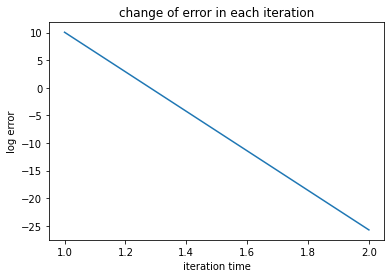

number of interation 1
the point that minimize the objective function is [-0.14285714  0.78571429]
the coordinate of points in the process [array([  20, 1000]), array([-0.14285714,  0.78571429])]
The norm of the gradient value 6.558459564010244e-12
error(norm of gradient) in the process [23616.433685042288, 6.558459564010244e-12]


In [210]:
from numpy import linalg as LA
from numpy.linalg import inv
import numpy as np
obj = lambda x:(2-2*x[0]-3*x[1])**2+(x[1]-1)**2+x[0]**2
def grad(x):
    gradient=[10*x[0]+12*x[1]-8,12*x[0]+20*x[1]-14]
    return gradient
eps = 1e-5  # termination criterion
##x0=np.array([-0.18,1.2])
x0=np.array([20,1000])
soln=[x0]
error=LA.norm(grad(x0))
error_list=[error]
H=np.matrix([[10,12],[12,20]])
H_invers=inv(A)
H_inverse=np.array(H_invers)
k=0
while error>eps:
    times=np.matmul(H_inverse,grad(x0))
    x0=np.subtract(x0,times)
    error=LA.norm(grad(x0))
    k=+1
    soln.append(x0)
    error_list.append(error)
    
x=[1,2]
error_log=[]
for i in range(k+1):
    e=np.log(error_list[i])
    error_log.append(e)
plt.plot(x, error_log)
plt.xlabel('iteration time')
plt.ylabel('log error')
plt.title('change of error in each iteration')
plt.show()
print("number of interation",k)
print("the point that minimize the objective function is",x0)
print("the coordinate of points in the process",soln)
print("The norm of the gradient value",LA.norm(grad(x0)))
print("error(norm of gradient) in the process",error_list)

## Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

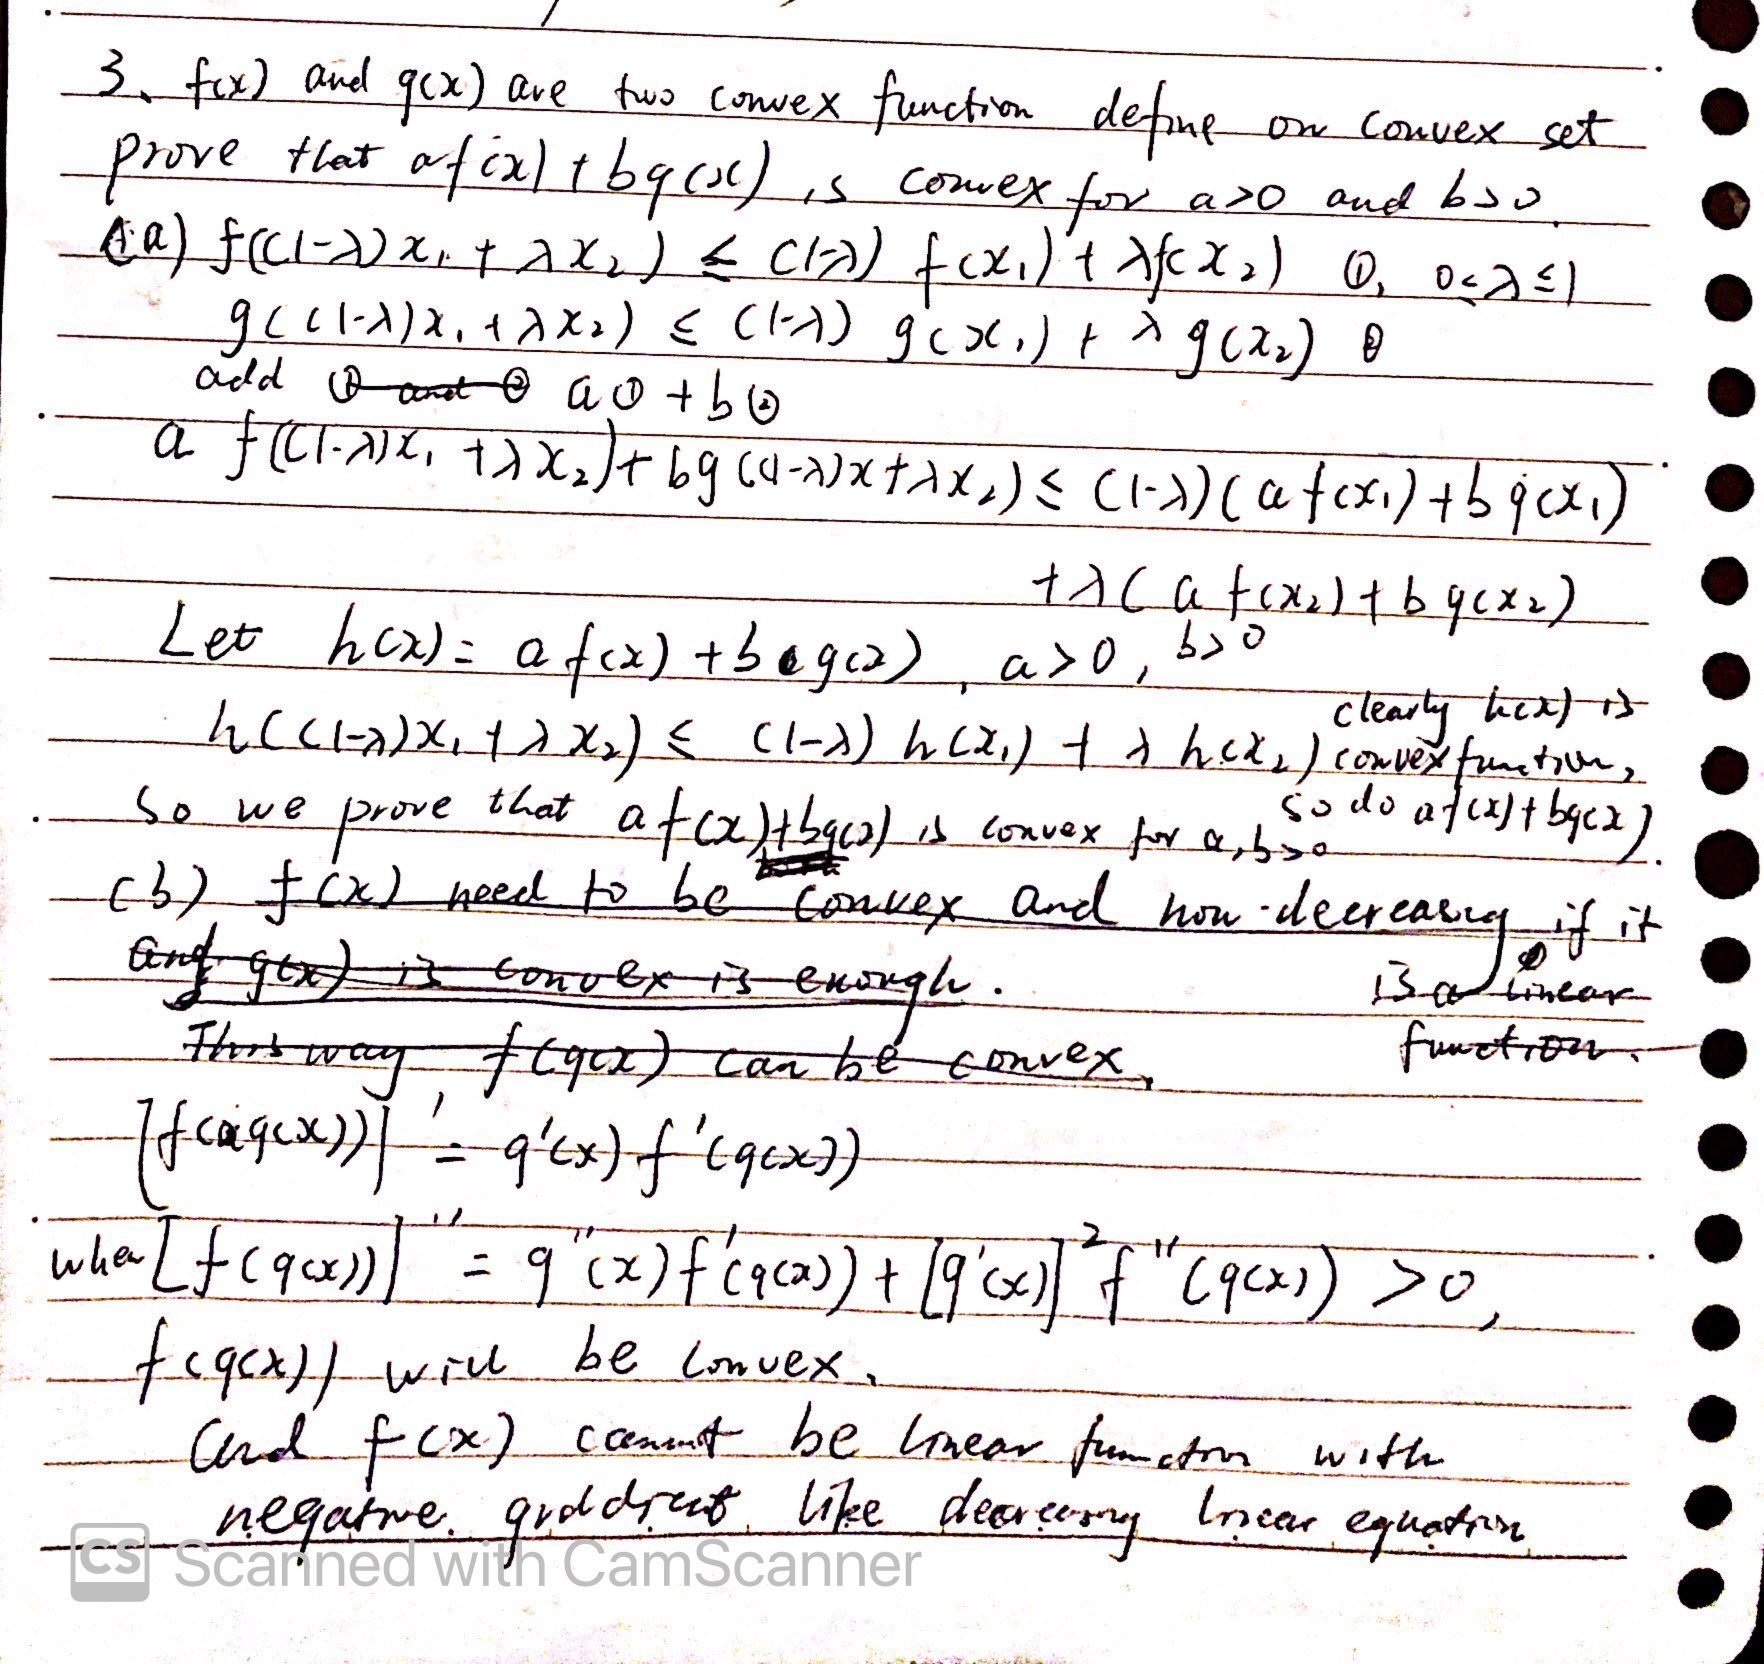

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$.

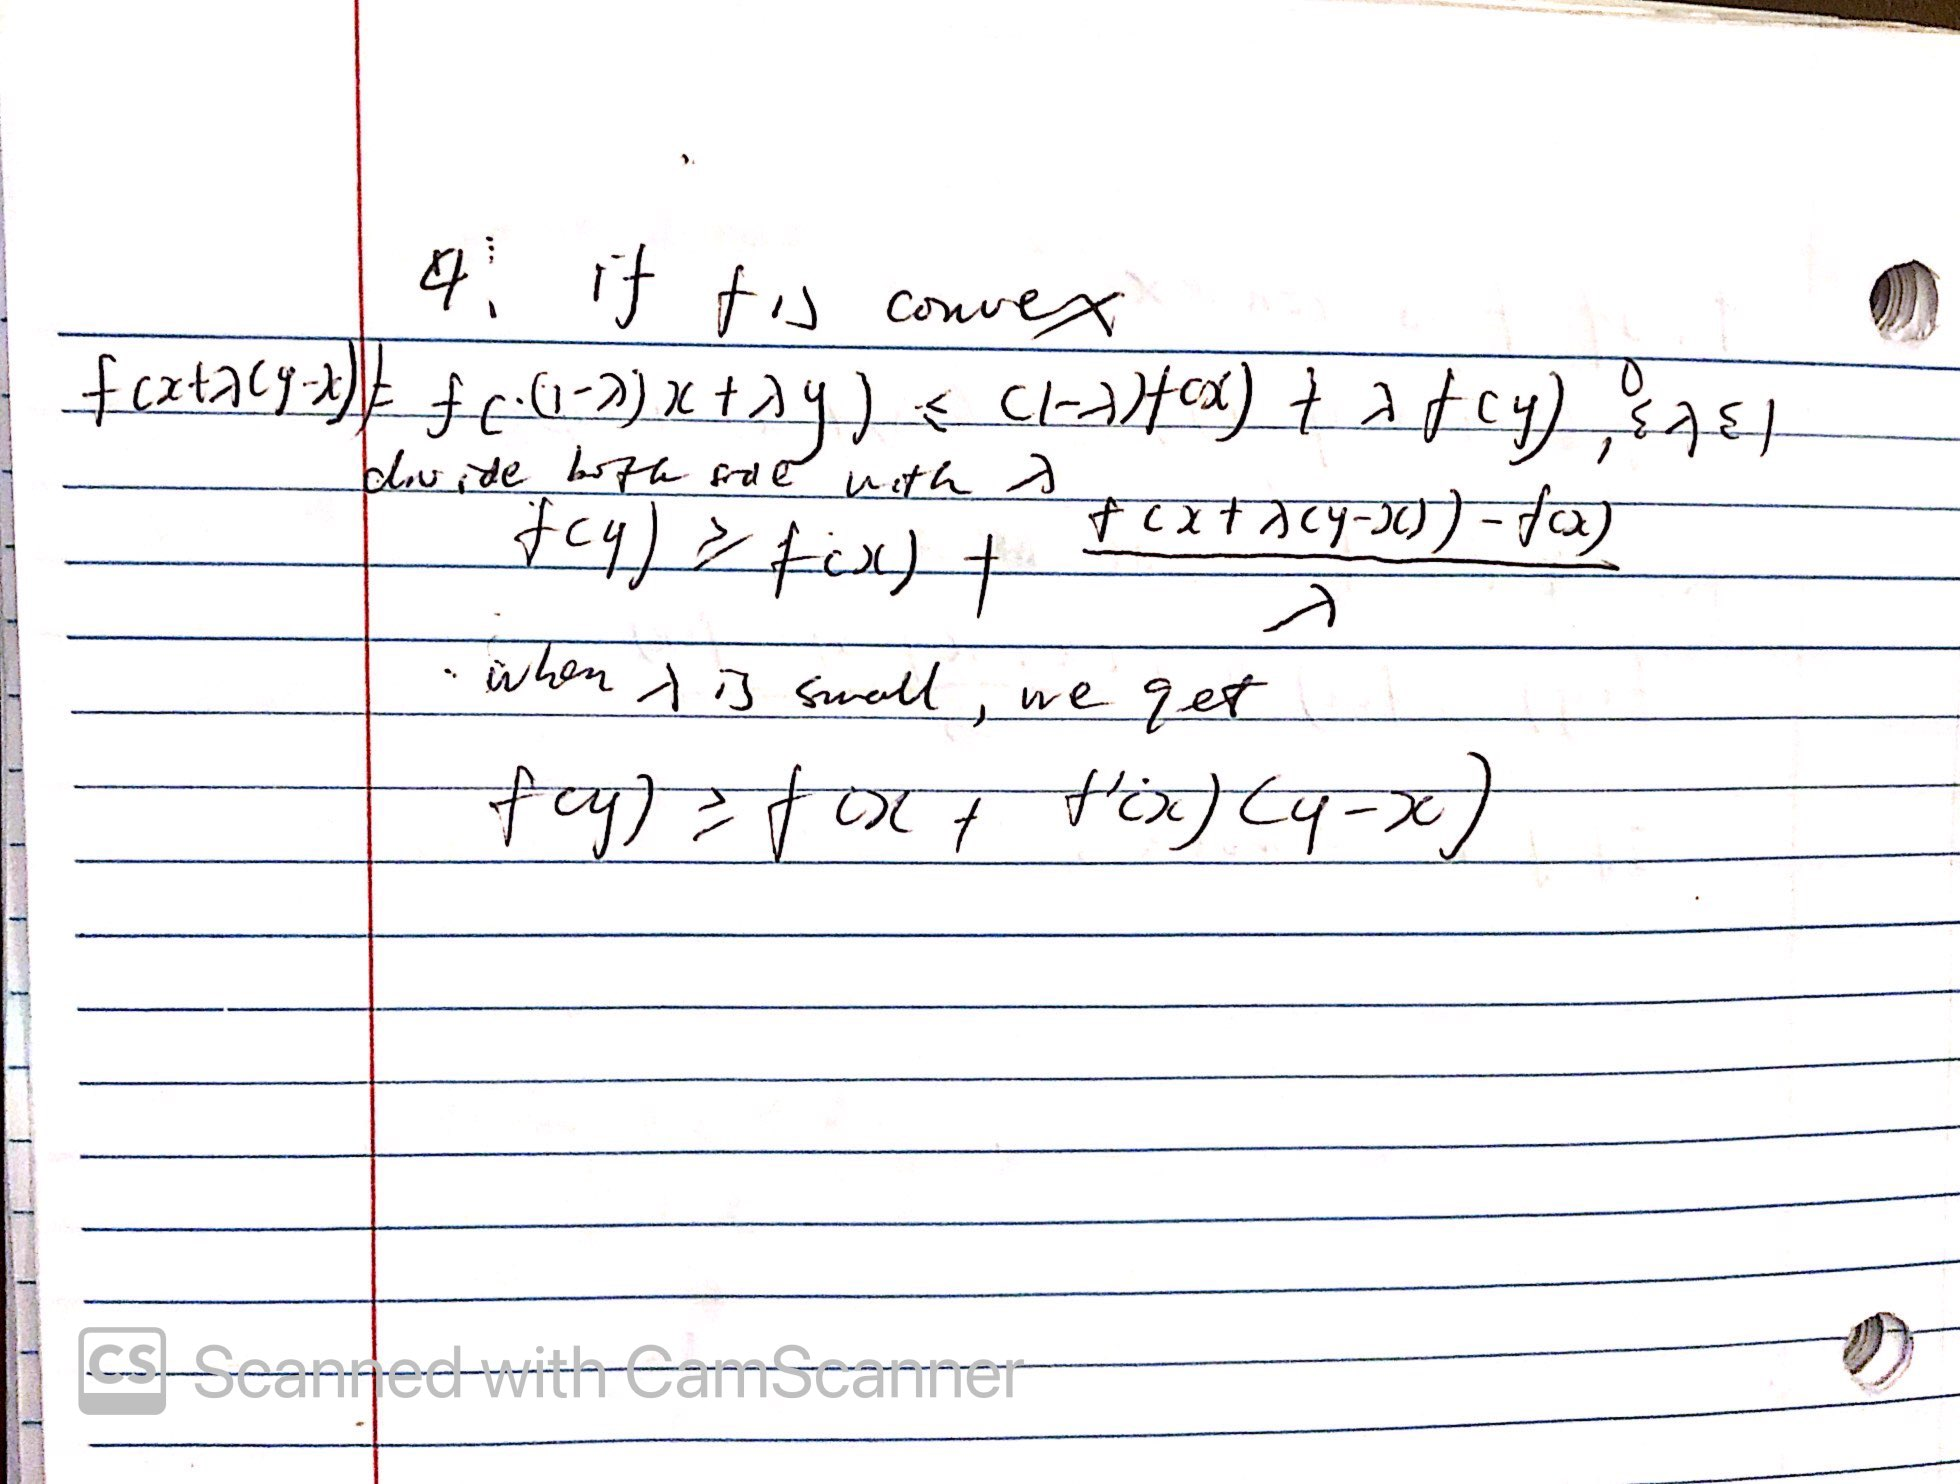

# Design Problems
## Problem 5 (20 points)
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

- (5 points) Formulate this problem as an optimization problem.
- (5 points) Is your problem convex?
- (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
- (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

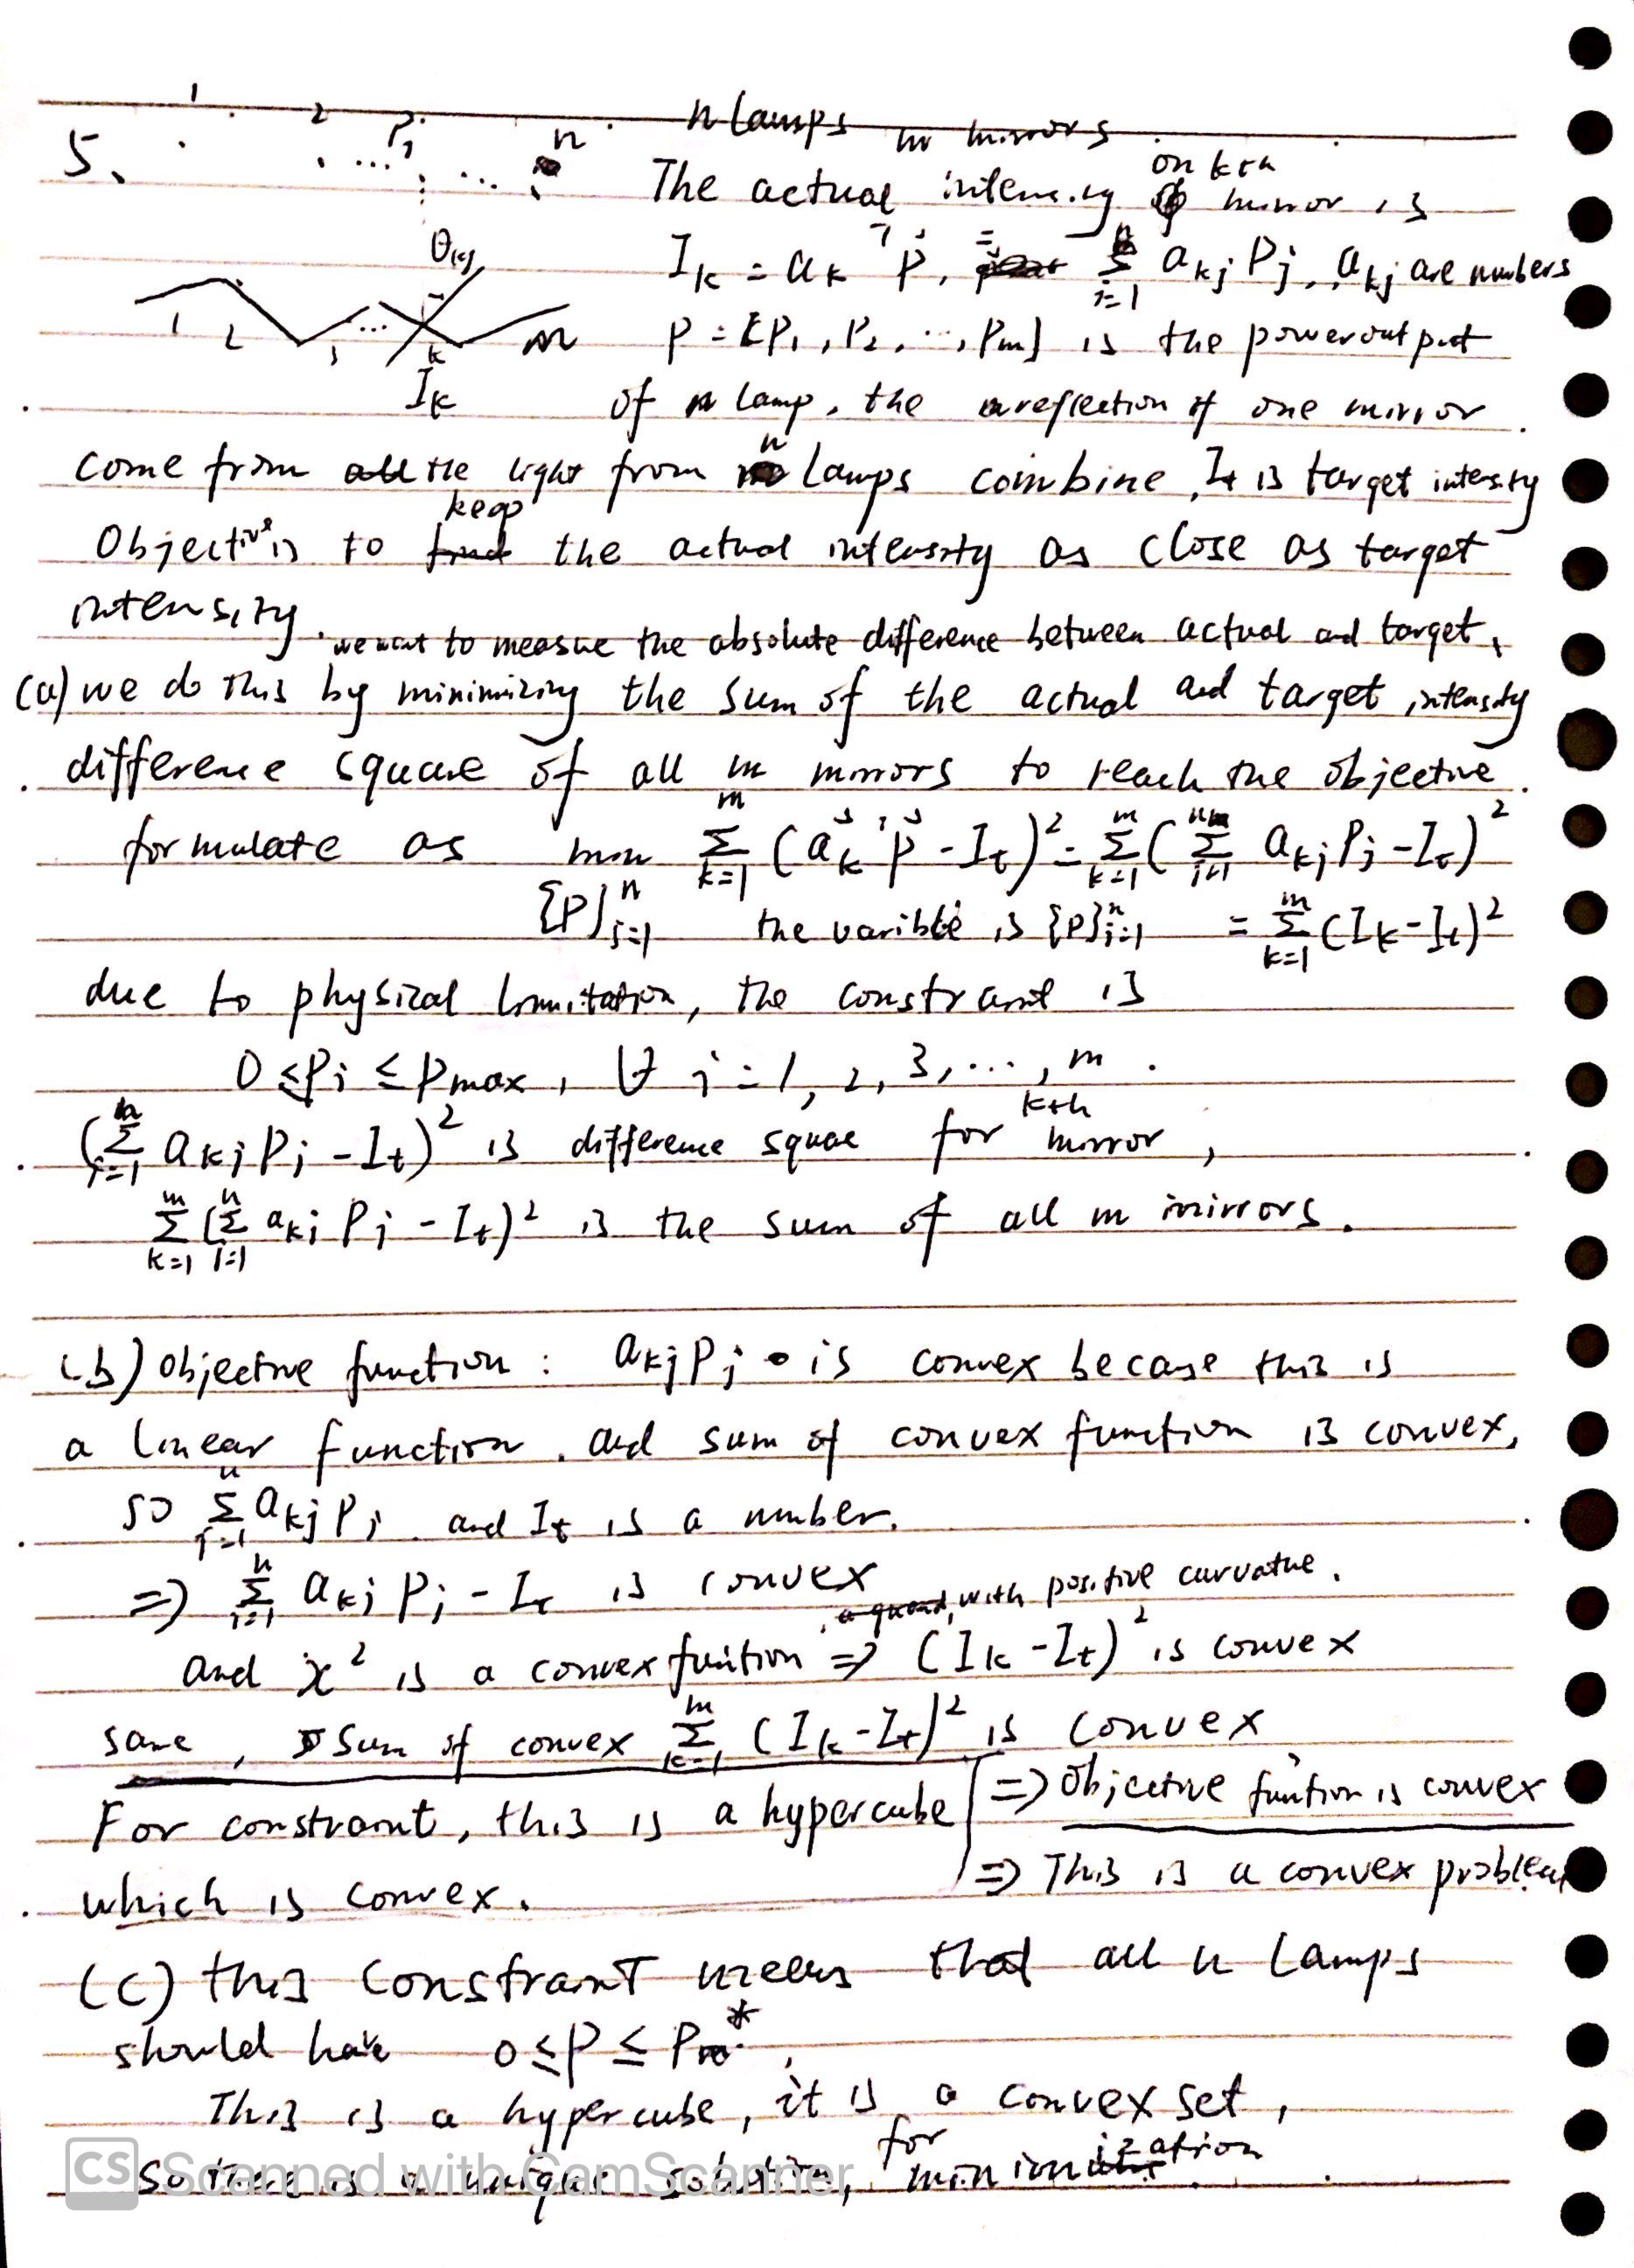

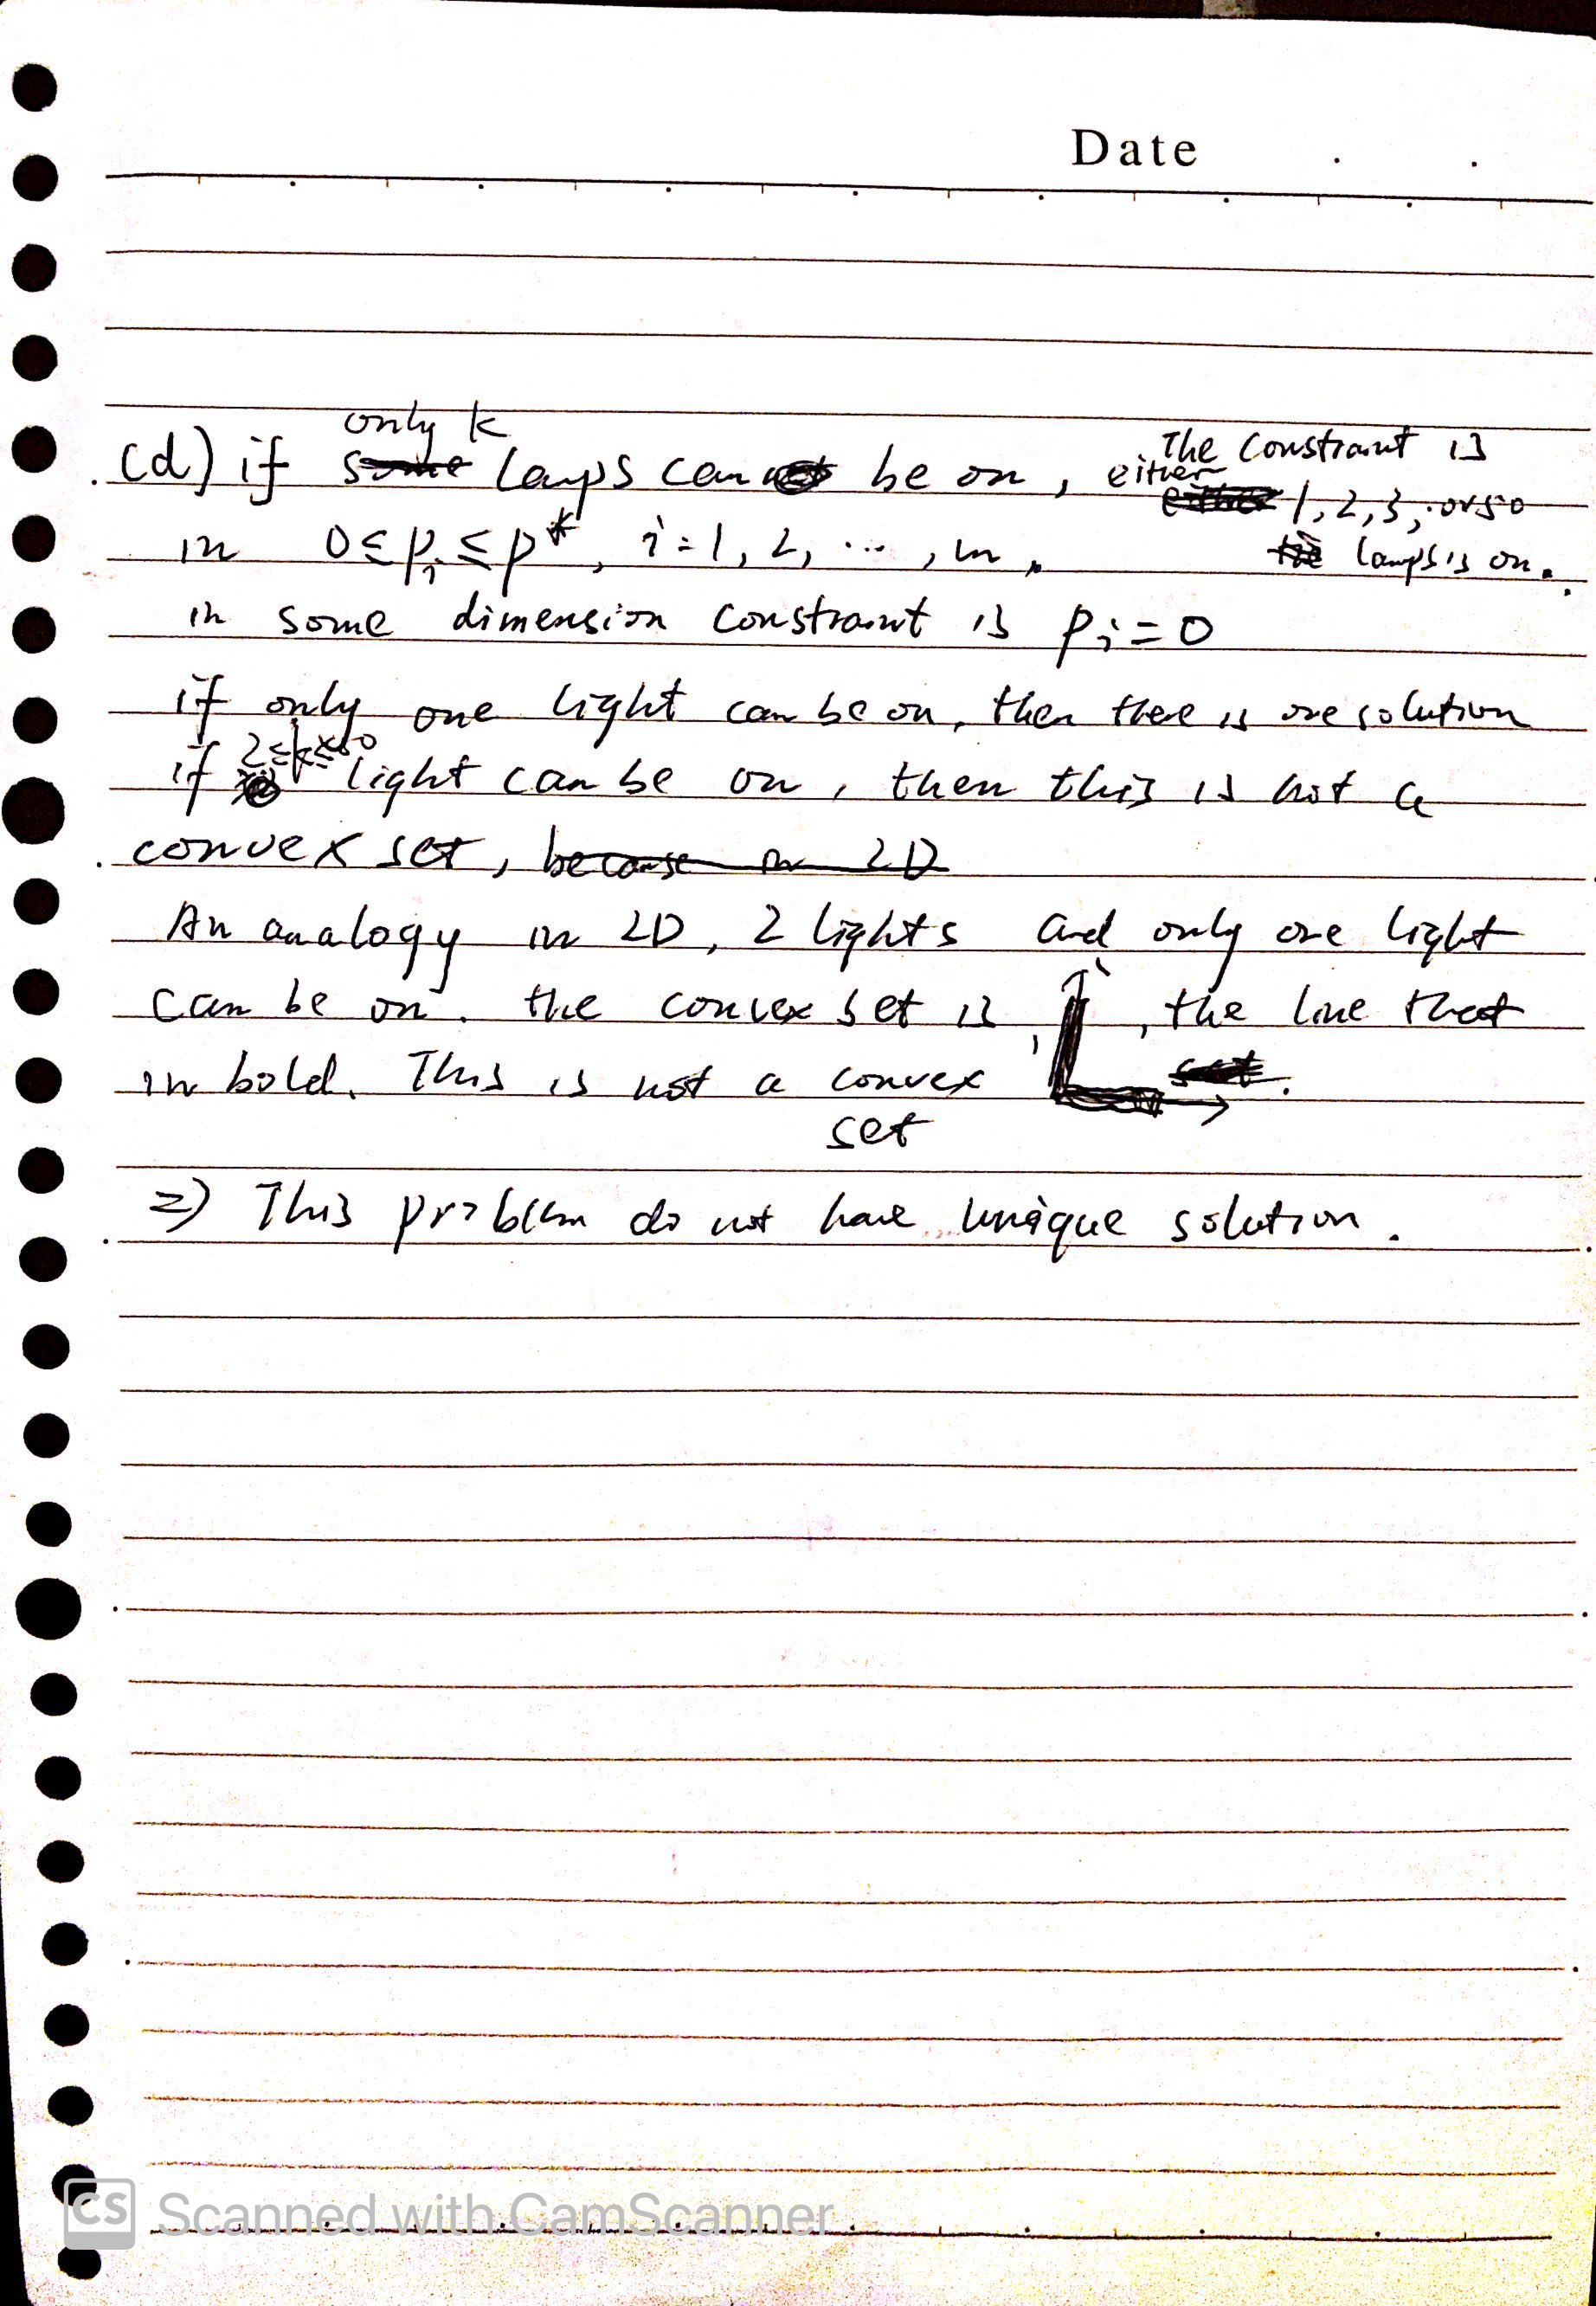